# Pymaceuticals Inc.
---

### Analysis

- After review of the data, we can see that there is an interesting correlation with Capomulin when looking at mouse L509 specifically. With most tumors, you would expect the volume to increase or remain constant over time, but while being given a dosage of Capomulin, we can see that the total volume of the Tumor has actually decreased over time. While this isn't a conclusive fact, this would warrant further study against a control group to see if there is a correlation across multiple samples. 

Resources:

#dataframes with duplicates
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html

#cleaning specific values
https://saturncloud.io/blog/how-to-remove-rows-with-specific-values-in-pandas-dataframe/#:~:text=Another%20method%20to%20remove%20rows,value%20we%20want%20to%20remove.

#aggregate method
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html

#linear regression 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

mouse_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how="right")

# Display the data table for preview
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [2]:
# Checking the number of mice.
len(mouse_df["Mouse ID"].value_counts())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_id = mouse_df.loc[mouse_df.duplicated(subset = ["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_id_df = mouse_df.loc[mouse_df["Mouse ID"] == "g989", :]
duplicate_id_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = mouse_df.drop(mouse_df[mouse_df["Mouse ID"] == "g989"].index) 
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_df["Mouse ID"].value_counts())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = cleaned_df["Tumor Volume (mm3)"].groupby(cleaned_df["Drug Regimen"]).mean()
median =cleaned_df["Tumor Volume (mm3)"].groupby(cleaned_df["Drug Regimen"]).median() 
variance = cleaned_df["Tumor Volume (mm3)"].groupby(cleaned_df["Drug Regimen"]).var()
st_dev = cleaned_df["Tumor Volume (mm3)"].groupby(cleaned_df["Drug Regimen"]).std()
sem =cleaned_df["Tumor Volume (mm3)"].groupby(cleaned_df["Drug Regimen"]).sem()

# Assemble the resulting series into a single summary DataFrame.
summary_stats = pd.DataFrame ({"Mean" : mean,
                              "Median": median, 
                               "Variance": variance, 
                               "St. Deviation": st_dev,
                               "Std. Error": sem
                              })
# Display Dataframe
summary_stats


,Mean,Median,Variance,St. Deviation,Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

aggregate_stats = cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std","sem"])
aggregate_stats


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

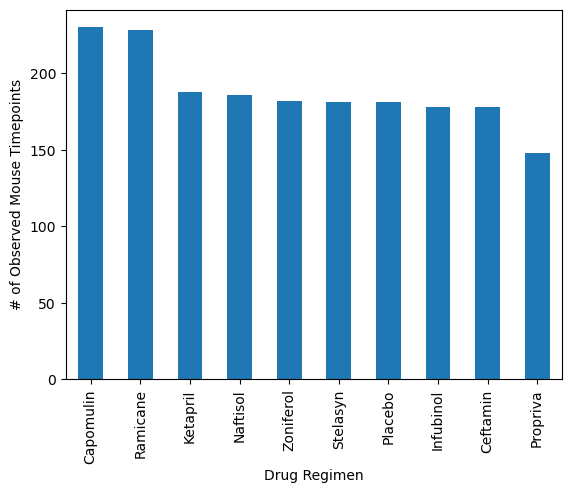

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#count total mice per regimen based on drug regimen
regimen_mice = cleaned_df["Drug Regimen"].value_counts()

regimen_mice.plot.bar( xlabel="Drug Regimen", ylabel="# of Observed Mouse Timepoints", )

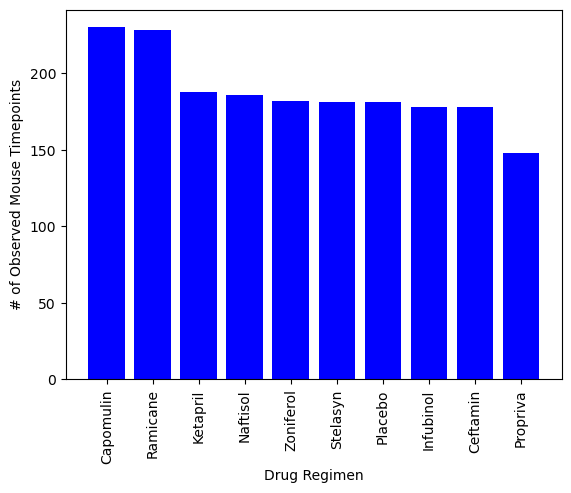

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug = regimen_mice.index.values
mice = regimen_mice.values

plt.bar(drug, mice, color = 'b', align = "center" )
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")
plt.show()


<Axes: ylabel='Sex'>

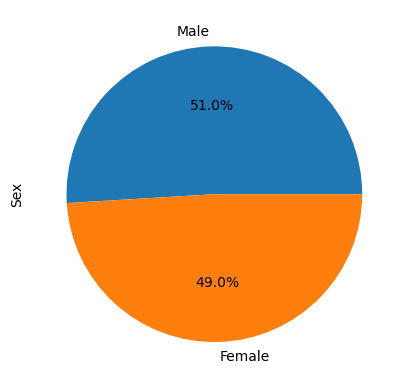

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_gender = cleaned_df["Sex"].value_counts()
mouse_gender.plot.pie(autopct="%1.1f%%")

Text(0, 0.5, 'Sex')

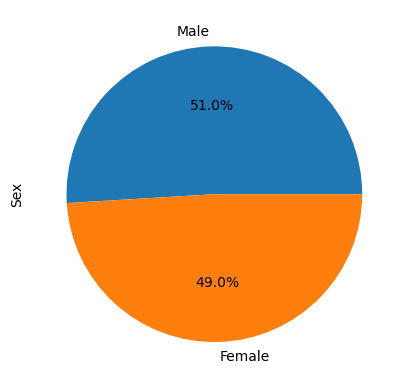

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
plt.pie(mouse_gender, labels=labels, autopct="%1.1f%%")
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#separate functions for all drugs
capomulin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin",:]
ramicane_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Ramicane",:]
infubinol_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Infubinol",:]
ceftamin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Ceftamin",:]

# Start by getting the last (greatest) timepoint for each mouse
#capomulin
capomulin_last = capomulin_df.groupby("Mouse ID").max()["Timepoint"]
capomulin_df = pd.DataFrame(capomulin_last)
capomulin_final = pd.merge(capomulin_df, cleaned_df, on=("Mouse ID","Timepoint"), how = "left")

#ramicane
ramicane_last = ramicane_df.groupby("Mouse ID").max()["Timepoint"]
ramicane_df = pd.DataFrame(ramicane_last)
ramicane_final = pd.merge(ramicane_df, cleaned_df, on=("Mouse ID", "Timepoint"), how = "left")

#infubinol

infubinol_last= infubinol_df.groupby("Mouse ID").max()["Timepoint"]
infubinol_df = pd.DataFrame(infubinol_last)
infubinol_final = pd.merge(infubinol_df, cleaned_df, on= ("Mouse ID", "Timepoint"), how = "left")


#ceftamin
ceftamin_last = ceftamin_df.groupby("Mouse ID").max()["Timepoint"]
ceftamin_df = pd.DataFrame(ceftamin_last)
ceftamin_final = pd.merge(ceftamin_df, cleaned_df, on= ("Mouse ID", "Timepoint"), how ="left")

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

# all merged dfs = capomulin_final, ramincane_final, infubinol_final, ceftamin_final
capomulin_final

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
5,i557,45,Capomulin,Female,1,24,47.685963,1
6,i738,45,Capomulin,Female,23,20,37.311846,2
7,j119,45,Capomulin,Female,7,23,38.125164,1
8,j246,35,Capomulin,Female,21,21,38.753265,1
9,l509,45,Capomulin,Male,17,21,41.483008,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)

regimen_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

drug_and_tumor = cleaned_df.loc[cleaned_df["Drug Regimen"] == x, "Tumor Volume (mm3)"]

for x in regimen_list:
    quartiles = cleaned_df.loc[cleaned_df["Drug Regimen"] == x, "Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq= quartiles[.25]
    upperq= quartiles[.75]
    iqr= (upperq-lowerq)
    lower_bound = (lowerq - (1.5*iqr))
    upper_bound= (upperq + (1.5*iqr))
    tumor_data.append(list(cleaned_df.loc[cleaned_df["Drug Regimen"] == x, "Tumor Volume (mm3)"]))
    if x == "Capomulin" or "Ramicane" or "Infubinol" or "Ceftamin":
        print("--------------------------------------------------------------------")
        print(f"Values above: {upper_bound} or below {lower_bound} could be outliers for {x}")

NameError: name 'x' is not defined

In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_data)
plt.xticks([1,2,3,4], regimen_list, rotation = 90)
plt.xlabel("Regimen")
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume by Drug Regimen")
plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin Treatment of Mouse L509')

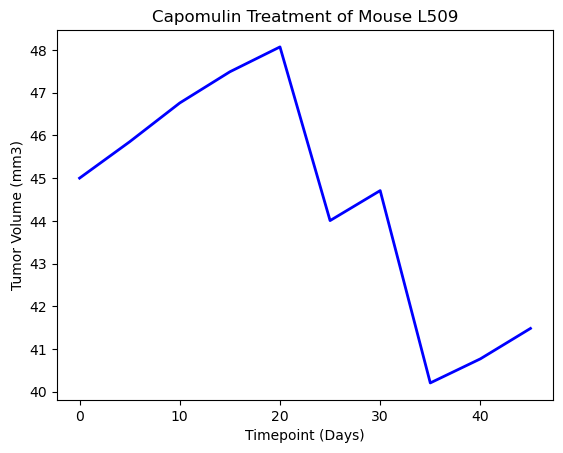

In [15]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#isolate mouse l509 & define as a variable
mouse_l509 = cleaned_df.loc[cleaned_df["Mouse ID"] == "l509",:]
time = mouse_l509["Timepoint"]
tumor_size = mouse_l509["Tumor Volume (mm3)"]


plt.plot(time, tumor_size, linewidth = 2, color = "blue")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse L509")

C:\Users\Alex\AppData\Local\Temp\ipykernel_86572\265874325.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_capomulin_volume = capomulin_final.groupby(['Mouse ID']).mean()


Text(0.5, 1.0, 'Mouse Weight Versus Average Tumor Volume')

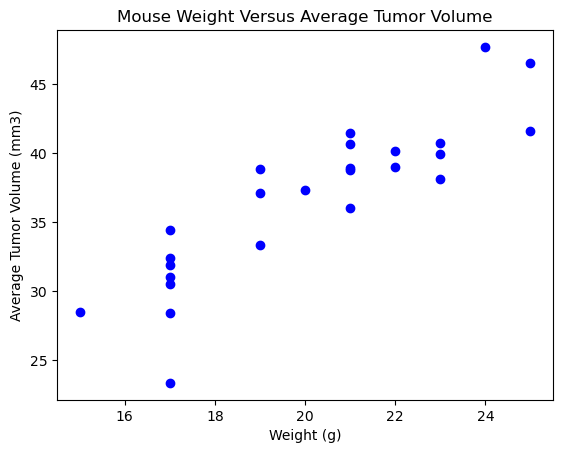

In [16]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
average_capomulin_volume = capomulin_final.groupby(['Mouse ID']).mean()

plt.scatter(average_capomulin_volume["Weight (g)"], average_capomulin_volume["Tumor Volume (mm3)"], color= "blue" )
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight Versus Average Tumor Volume")

## Correlation and Regression

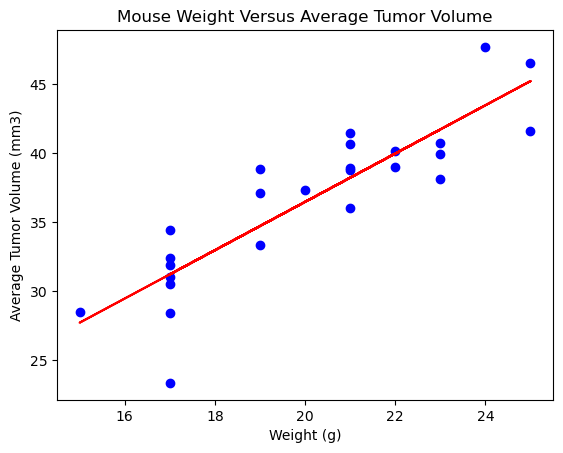

In [17]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(average_capomulin_volume["Weight (g)"], average_capomulin_volume["Tumor Volume (mm3)"])

#data from prior example
plt.scatter(average_capomulin_volume["Weight (g)"], average_capomulin_volume["Tumor Volume (mm3)"], color= "blue" )
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight Versus Average Tumor Volume")

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(average_capomulin_volume["Weight (g)"], average_capomulin_volume["Tumor Volume (mm3)"])
regression = average_capomulin_volume["Weight (g)"]* slope + intercept
plt.plot(average_capomulin_volume["Weight (g)"], regression, color="red")